In [3]:
import sys
sys.path.append('C:\RTNeural\python')

import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from model_utils import save_model

In [4]:
dataset_path = 'data.json'

In [5]:
with open(dataset_path, 'r') as fp:
    data = json.load(fp)

In [6]:
inputs = np.array(data['mfcc'])
targets = np.array(data['labels'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(inputs, targets, test_size=0.2)

In [8]:
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [9]:
X_train.shape

(3994, 259, 13, 1)

In [10]:
len(X_train[0])

259

In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train[0].shape),
    keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding='same'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding='same'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(32, (2, 2), activation='relu'),
    keras.layers.MaxPool2D((2, 2), strides=(2, 2), padding='same'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 257, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 129, 6, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 129, 6, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 4, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 2, 32)        0         
 2D)                                                             
                                                        

In [14]:
history = model.fit(X_train, y_train,
          validation_data=(X_validation, y_validation),
          epochs=50,
          batch_size=32)

Epoch 1/50
125/125 [==============================] - 5s 37ms/step - loss: 2.4103 - accuracy: 0.1259 - val_loss: 2.1466 - val_accuracy: 0.2492
Epoch 2/50
125/125 [==============================] - 6s 48ms/step - loss: 2.1776 - accuracy: 0.2166 - val_loss: 1.9523 - val_accuracy: 0.3654
Epoch 3/50
125/125 [==============================] - 6s 46ms/step - loss: 1.9962 - accuracy: 0.2892 - val_loss: 1.7062 - val_accuracy: 0.4364
Epoch 4/50
125/125 [==============================] - 5s 41ms/step - loss: 1.8331 - accuracy: 0.3358 - val_loss: 1.5288 - val_accuracy: 0.4464
Epoch 5/50
125/125 [==============================] - 5s 37ms/step - loss: 1.7187 - accuracy: 0.3741 - val_loss: 1.4019 - val_accuracy: 0.5115
Epoch 6/50
125/125 [==============================] - 5s 37ms/step - loss: 1.6420 - accuracy: 0.4144 - val_loss: 1.3340 - val_accuracy: 0.5175
Epoch 7/50
125/125 [==============================] - 5s 38ms/step - loss: 1.5517 - accuracy: 0.4367 - val_loss: 1.2717 - val_accuracy: 0.5455

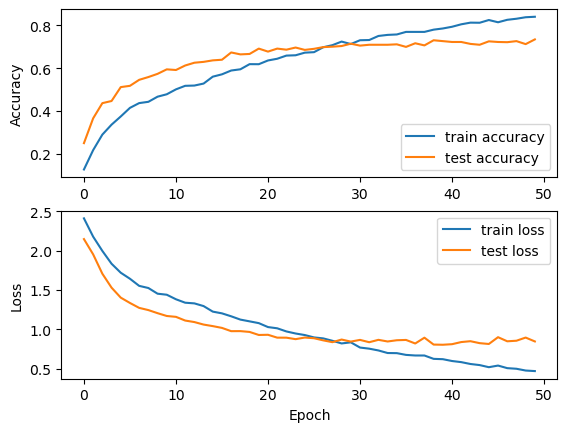

In [15]:
fig, axes = plt.subplots(2)

axes[0].plot(history.history["accuracy"], label="train accuracy")
axes[0].plot(history.history["val_accuracy"], label="test accuracy")
axes[0].set_ylabel("Accuracy")
axes[0].legend(loc="lower right")

axes[1].plot(history.history["loss"], label="train loss")
axes[1].plot(history.history["val_loss"], label="test loss")
axes[1].set_ylabel("Loss")
axes[1].set_xlabel("Epoch")
axes[1].legend(loc="upper right")

In [16]:
prediction = model.predict(X_test)
predicted_index = np.argmax(prediction, axis=1)

print("Expected: {} Predicted: {}".format(y_test, predicted_index))

40/40 [==============================] - 0s 8ms/step
Expected: [9 8 1 ... 0 8 7] Predicted: [9 8 1 ... 0 8 7]


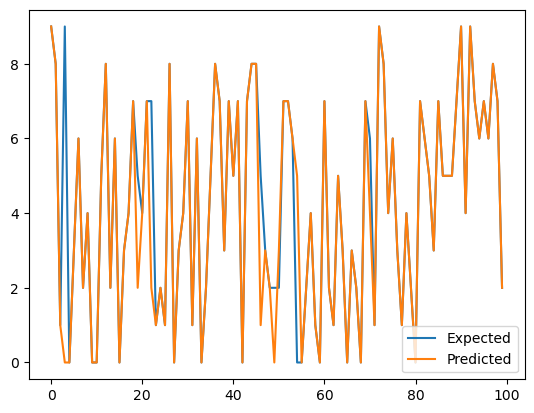

In [17]:
plt.plot(y_test[:100], label="Expected")
plt.plot(predicted_index[:100], label="Predicted")
plt.legend(loc="lower right")

In [18]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: {}'.format(test_accuracy))

40/40 [==============================] - 0s 8ms/step - loss: 0.3324 - accuracy: 0.9071
Accuracy: 0.90712571144104


In [19]:
save_model(model, 'model_weights.json')